# RetroTide prototype

Finds 'best' PKS designs for a given chemical structure

This notebook was designed as a test to build 10 commodity and 10 specialty chemicals

by Tyler W. H. Backman and Vincent Blay

In [1]:
# uncomment to install Retrotide
import os
os.system('cd ../ && pip3 install -e ./')

Obtaining file:///Users/yashchainani96/PycharmProjects/retrotide
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Attempting uninstall: retrotide
    Found existing installation: retrotide 0.1
    Uninstalling retrotide-0.1:
      Successfully uninstalled retrotide-0.1
  Running setup.py develop for retrotide


/Users/yashchainani96/anaconda3/envs/comprehensive_env_py38/lib/python3.8/site-packages/pip/_internal/metadata/pkg_resources.py:275: UserWarning: Unbuilt egg for minedatabase [unknown version] (/Users/yashchainani96/PycharmProjects/pathway_discovery_V4.0/MINE-Database_V2)
  self._ws.require(name)


0

In [2]:
from retrotide import structureDB, designPKS
import retrotide

[13:33:08] product atom-mapping number 10 not found in reactants.
[13:33:08] product atom-mapping number 10 not found in reactants.


In [3]:
from rdkit import Chem
from rdkit.Chem import Draw, rdFMCS
from rdkit.Chem.Draw import IPythonConsole
%matplotlib inline

In [4]:
from collections import OrderedDict

### demo creating a cluster with BCS

In [5]:
from retrotide import structureDB, designPKS

In [6]:
import retrotide

In [7]:
testcluster = retrotide.Cluster(modules=[retrotide.allStarterTypes[0], 
                                         retrotide.allModuleTypes[0], 
                                         retrotide.allModuleTypes[1]])

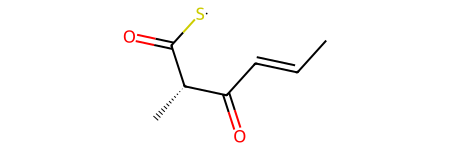

In [8]:
testcluster.computeProduct(structureDB)

### design some PKSs

In [9]:
### extender units
molecules_data = [
    {"smiles": "O=C(O)CC(=O)[S]", "id": "Malonyl-CoA", "type": "CoA", "shortName": "mal"},
    {"smiles": "C[C@@H](C(=O)O)C(=O)[S]", "id": "Methylmalonyl-CoA", "type": "CoA", "shortName": "mmal"},
    #{"smiles": "C=CC[C@@H](C(=O)O)C(=O)[S]", "id":"allylmal", "type": "CoA", "shortName": "allylmal"}
]

with open("../retrotide/data/extenders.smi", "w") as file:
    file.write("smiles\tid\ttype\tshortName\n")
    
    for molecule in molecules_data:
        smiles = molecule["smiles"]
        
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            print(f"Warning: Invalid SMILES string for {molecule['id']}")
            continue
        
        file.write(f"{smiles}\t{molecule['id']}\t{molecule['type']}\t{molecule['shortName']}\n")

print("Extenders SMI file created successfully.")

Extenders SMI file created successfully.


In [10]:
### starter units
molecules_data = [
    {"smiles": "CC(=O)[S]", "id": "Malonyl-CoA", "type": "CoA", "shortName": "mal"},
    {"smiles": "CCC(=O)[S]", "id": "Methylmalonyl-CoA", "type": "CoA", "shortName": "mmal"},
    #{"smiles": "C=CCC(=O)[S]", "id":"allylmal", "type": "CoA", "shortName": "allylmal"}
]

with open("../retrotide/data/starters.smi", "w") as file:
    file.write("smiles\tid\ttype\tshortName\n")
    
    for molecule in molecules_data:
        smiles = molecule["smiles"]
        
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            print(f"Warning: Invalid SMILES string for {molecule['id']}")
            continue
        
        file.write(f"{smiles}\t{molecule['id']}\t{molecule['type']}\t{molecule['shortName']}\n")

print("Starters SMI file created successfully.")

Starters SMI file created successfully.


In [11]:
target = ('C[C@H]1[C@H](C[C@H](O)/C=C\[C@@H]([C@H](O)[C@H](/C=C(C[C@@H]([C@@H](O)[C@@H]([C@@H](OC(N)=O)[C@H](/C=C\C=C)C)C)C)/C)C)C)OC([C@H](C)[C@H]1O)=O')

designs = designPKS(Chem.MolFromSmiles(target))
#repr(designs[-1][0][0].modules)

computing module 1
   testing 18 designs
   best score is 0.020833333333333332
computing module 2
   testing 162 designs
   best score is 0.06018518518518518
computing module 3
   testing 225 designs
   best score is 0.11290322580645161
computing module 4
   testing 225 designs
   best score is 0.1780821917808219
computing module 5
   testing 225 designs
   best score is 0.24748040313549832
computing module 6
   testing 225 designs
   best score is 0.32662192393736017
computing module 7
   testing 225 designs
   best score is 0.37666666666666665
computing module 8
   testing 225 designs
   best score is 0.43446088794926
computing module 9
   testing 225 designs
   best score is 0.49056603773584906
computing module 10
   testing 225 designs
   best score is 0.5243664717348928
computing module 11
   testing 225 designs
   best score is 0.5521698984302862
computing module 12
   testing 225 designs
   best score is 0.5473684210526316


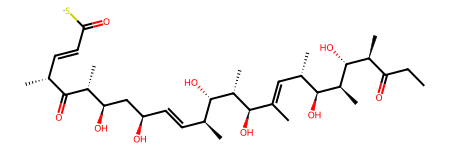

In [12]:
designs[-1][0][0].computeProduct(structureDB)

In [13]:
repr(designs[-1][15][0].modules)

'[["AT{\'substrate\': \'Methylmalonyl-CoA\'}", \'loading: True\'], ["AT{\'substrate\': \'Methylmalonyl-CoA\'}", \'loading: False\'], ["AT{\'substrate\': \'Methylmalonyl-CoA\'}", "KR{\'type\': \'B1\'}", \'loading: False\'], ["AT{\'substrate\': \'Methylmalonyl-CoA\'}", "KR{\'type\': \'B1\'}", \'loading: False\'], ["AT{\'substrate\': \'Methylmalonyl-CoA\'}", "KR{\'type\': \'B1\'}", \'DH{}\', \'loading: False\'], ["AT{\'substrate\': \'Methylmalonyl-CoA\'}", "KR{\'type\': \'B1\'}", \'loading: False\'], ["AT{\'substrate\': \'Methylmalonyl-CoA\'}", "KR{\'type\': \'B1\'}", \'loading: False\'], ["AT{\'substrate\': \'Malonyl-CoA\'}", "KR{\'type\': \'B\'}", \'DH{}\', \'loading: False\'], ["AT{\'substrate\': \'Malonyl-CoA\'}", "KR{\'type\': \'B\'}", \'DH{}\', \'loading: False\'], ["AT{\'substrate\': \'Methylmalonyl-CoA\'}", "KR{\'type\': \'B1\'}", \'loading: False\'], ["AT{\'substrate\': \'Methylmalonyl-CoA\'}", "KR{\'type\': \'C1\'}", \'loading: False\'], ["AT{\'substrate\': \'Malonyl-CoA\'}", "K

#### Example 1

In [ ]:
target = ('CCCCCC')

designs = designPKS(Chem.MolFromSmiles(target))
repr(designs[-1][0][0].modules)

In [ ]:
bound_product_mol_object = designs[-1][0][0].computeProduct(structureDB)

In [ ]:
from rdkit.Chem import AllChem
Chem.SanitizeMol(bound_product_mol_object)
rxn = AllChem.ReactionFromSmarts('[C:1](=[O:2])[S:3]>>[C:1](=[O:2])[O].[S:3]')
product = rxn.RunReactants((bound_product_mol_object,))[0][0]
Chem.SanitizeMol(product)

In [ ]:
repr(designs[-1][15][0].modules)

#### Example 2

In [ ]:
Chem.MolFromSmiles('CCCCC(O)=O')

In [ ]:
target = ('CCCCCC(O)=O')

designs = designPKS(Chem.MolFromSmiles(target))
repr(designs[-1][0][0].modules)

In [ ]:
repr(designs[-1][5][0].modules)

In [ ]:
repr(designs[-1][0][0].modules)

In [ ]:
target = ('CC=O')

designs = designPKS(Chem.MolFromSmiles(target))
print('PKS design: ' + repr(designs[-1][0][0].modules))
print('score: ' + str(designs[-1][0][1]))
designs[-1][0][0].computeProduct(structureDB)

In [ ]:
target = ('CCC(=O)C')

designs = designPKS(Chem.MolFromSmiles(target))
print('PKS design: ' + repr(designs[-1][0][0].modules))
print('score: ' + str(designs[-1][0][1]))
designs[-1][0][0].computeProduct(structureDB)

In [ ]:
designs[-1][0][0].modules

In [ ]:
bound_product_mol_object = designs[-1][0][0].computeProduct(structureDB)

In [ ]:
from rdkit.Chem import AllChem
Chem.SanitizeMol(bound_product_mol_object)
rxn = AllChem.ReactionFromSmarts('[C:1](=[O:2])[S:3]>>[C:1](=[O:2])[O].[S:3]')
product = rxn.RunReactants((bound_product_mol_object,))[0][0]
Chem.SanitizeMol(product)

In [ ]:
product

In [ ]:
from rdkit.Chem import AllChem
Chem.SanitizeMol(bound_product_mol_object)
rxn = AllChem.ReactionFromSmarts('[C:1](=[O:2])[S:3]>>[C:1](=[O:2])[O].[S:3]')
product = rxn.RunReactants((bound_product_mol_object,))[0][0]
Chem.SanitizeMol(product)

In [ ]:
product

In [ ]:
designs[-1][0][0].modules[0].computeProduct()

In [ ]:
target = ('CC[C@@H]1[C@@]([C@@H]([C@H](C(=O)[C@@H](C[C@@]([C@@H]([C@H]([C@@H]'
          '([C@H](C(=O)O1)C)O[C@H]2C[C@@]([C@H]([C@@H](O2)C)O)(C)OC)C)O[C@H]'
          '3[C@@H]([C@H](C[C@H](O3)C)N(C)C)O)(C)O)C)C)O)(C)O')

designs = designPKS(Chem.MolFromSmiles(target))
print('PKS design: ' + repr(designs[-1][0][0].modules))
print('score: ' + str(designs[-1][0][1]))
designs[-1][0][0].computeProduct(structureDB)

### Test on a bunch of compounds

In [ ]:
substrateLibrary = OrderedDict([
    # 10 commodity chemicals
    ('octane', 'CCCCCCCC'),
    ('Butanone', 'CCC(=O)C'),
    ('2-pentanone', 'O=C(C)CCC'),
    ('caprolactone', 'C1CCC(=O)OCC1'),
    ('Acrylic acid', 'C=CC(=O)O'),
    ('Adipic acid', 'O=C(O)CCCCC(=O)O'),
    ('Maleic acid', 'O=C(O)\C=C/C(=O)O'),
    ('Propionic acid', 'CCC(=O)O'),
    ('Dodecane', 'CCCCCCCCCCCC'),
    ('Linolenic acid ', 'O=C(O)CCCC\C=C/C\C=C/C\C=C/CCCCC'),
    
    # 10 specialty chemicals
    ('1,2,4-Butanetriol', 'C(CO)[C@@H](CO)O'),
    ('γ-Valerolactone', 'CC1CCC(=O)O1'),
    ('Narbonolide', 'CC[C@@H]1[C@@H](/C=C/C(=O)[C@@H](C[C@@H]([C@@H]([C@H](C(=O)[C@H](C(=O)O1)C)C)O)C)C)C'),
    ('Polyhydroxyethylmethacrylate', 'CCCCCCCCC=CCCCCCCCCOCC(C[N+](C)(C)CCOCCO)OCCCCCCCCC=CCCCCCCCC'),
    ('Alitretinoin', 'C\C(\C=C\C1=C(C)CCCC1(C)C)=C\C=C\C(\C)=C\C(O)=O'),
    ('alpha-Amyl cinnamaldehyde', 'CCCCC\C(C=O)=C\C1=CC=CC=C1'),
    ('Aminocaproic acid', 'NCCCCCC(O)=O'),
    ('Aminolevulinic acid', 'NCC(=O)CCC(O)=O'),
    ('Azelaic acid', 'OC(=O)CCCCCCCC(O)=O'),
    ('Bempedoic acid', 'CC(C)(CCCCCC(O)CCCCCC(C)(C)C(O)=O)C(O)=O'),
])

In [ ]:
def plotMolComparison(mol1, mol2):
    
    # convert to smiles and back to fix internal bug in RDKit
    # mol1 = Chem.MolFromSmiles(Chem.MolToSmiles(mol1, isomericSmiles=True))
    # mol2 = Chem.MolFromSmiles(Chem.MolToSmiles(mol2, isomericSmiles=True))
    
    # compute MCS between mol and comparisonStructure
    mcsComp = rdFMCS.FindMCS([mol1, mol2], timeout=1, matchValences=True, matchChiralTag=False, bondCompare=Chem.rdFMCS.BondCompare.CompareOrderExact) # search for 1 second max
    
    score = mcsComp.numAtoms / (len(mol1.GetAtoms()) + len(mol2.GetAtoms()) - mcsComp.numAtoms)
    display(score)
    mcsCompSmarts = Chem.MolFromSmarts(mcsComp.smartsString)
    molHighlightAtomList = mol1.GetSubstructMatch(mcsCompSmarts)
    compHighlightAtomList = mol2.GetSubstructMatch(mcsCompSmarts)
    
    # plot SVG with RDKit 
    return Draw.MolsToGridImage([
        mol1, mol2], 
        legends=['', ''], 
        molsPerRow=2, 
        highlightAtomLists=[molHighlightAtomList, compHighlightAtomList], 
        useSVG=True, 
        subImgSize=(400, 400))

In [ ]:
designs[-1][0]

In [ ]:
%%time
for name, smiles in substrateLibrary.items():
    print('#### building ' + name + ' ####')
    targetMol = Chem.MolFromSmiles(smiles)
    designs = designPKS(targetMol, maxDesignsPerRound=25, similarity='mcs')
    print('PKS design: ' + repr(designs[-1][0][0].modules))
    print('score: ' + str(designs[-1][0][1]))
    product = designs[-1][0][0].computeProduct(structureDB)
    
    display(plotMolComparison(product, targetMol))

## Exploring other similarity metrics

In [ ]:
from rdkit.Chem import AllChem, MolFromSmiles
from rdkit import Chem, DataStructs

In [ ]:
%%time
for name, smiles in substrateLibrary.items():
    print('#### building ' + name + ' ####')
    targetMol = Chem.MolFromSmiles(smiles)
    designs = designPKS(targetMol, maxDesignsPerRound=25, similarity="atomatompath")
    print('PKS design: ' + repr(designs[-1][0][0].modules))
    print('score: ' + str(designs[-1][0][1]))
    product = designs[-1][0][0].computeProduct(structureDB)
    
    display(plotMolComparison(product, targetMol))

In [ ]:
def my_similarity(mol1, mol2):
    f = lambda m: AllChem.GetMorganFingerprintAsBitVect(m, radius=3, useFeatures=False, useChirality=True, nBits=2048)
    fps = [f(mol) for mol in (mol1, mol2)]
    metric = DataStructs.AllBitSimilarity
    score = metric(fps[1], fps[0])
    return score

%%time
for name, smiles in substrateLibrary.items():
    print('#### building ' + name + ' ####')
    targetMol = Chem.MolFromSmiles(smiles)
    designs = designPKS(targetMol, maxDesignsPerRound=25, similarity=my_similarity)
    print('PKS design: ' + repr(designs[-1][0][0].modules))
    print('score: ' + str(designs[-1][0][1]))
    product = designs[-1][0][0].computeProduct(structureDB)
    
    display(plotMolComparison(product, targetMol))